In [194]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [195]:
#setting the parameter of the figure
%matplotlib inline
rcParams['figure.figsize'] = [10,8]

In [196]:
#reading the csv
address = '/Users/ankurrastogi/Chetna/Practise/Oyewiki_Practice/email_list.csv'
email_List = pd.read_csv(address)
#emailList.head()

In [197]:
#storing the emails in a list
email_IDs = email_List.email.tolist()
#email_IDs

# Analyzing the popular email providers:

In [198]:
#creating a dictionary which will store the email providers names  
#(text after the '@' symbol)
email_Domain_Dic = {}         
for emailID in email_IDs:
    email_Elements = emailID.lower().split('@') 
    email_Providers = email_Elements[1]
    if email_Providers not in email_Domain_Dic:
        email_Domain_Dic[email_Providers] = 1
    else:
        email_Domain_Dic[email_Providers] = email_Domain_Dic[email_Providers] + 1
# print(emailDomainDic)

In [199]:
#in order to remove outliers from the dataset, we created a refined dictionary and 
#stored the email providers whose count is less than equal to 3 in a variable named 'others'
refined_Dict = {'others' : 0}
count = 0
for key in email_Domain_Dic:
    if email_Domain_Dic[key] > 3:
        refined_Dict[key] = email_Domain_Dic[key]
    else:
        refined_Dict['others'] += email_Domain_Dic[key]
print(refined_Dict)

{'others': 65, 'gmail.com': 5647, 'live.com': 13, 'hotmail.com': 35, 'yahoo.com': 144, 'yahoo.co.in': 33, 'yahoo.in': 25, 'outlook.com': 37, 'rediffmail.com': 61, 'ymail.com': 7, 'icloud.com': 8}


In [200]:
#creating two lists: first is storing the email provider's names and 
#second is storing the count for those email providers
keys = []
values = []
for key, value in sorted(refinedDict.items(), key=lambda item: item[1], reverse=True):
    keys.append(key)
    values.append(value)

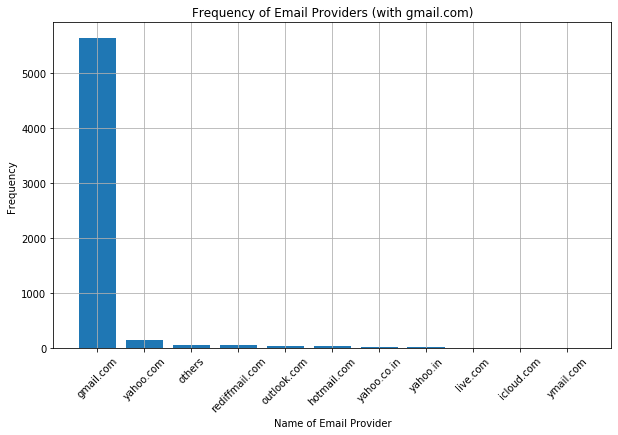

In [215]:
#plotting the bar chart for email providers 
fig = plt.figure(figsize = (10,6))
plt.bar(keys,values)
plt.xticks(rotation=45)
plt.title("Frequency of Email Providers (with gmail.com)")
plt.xlabel("Name of Email Provider")
plt.ylabel("Frequency")
plt.grid()
plt.show()
fig.savefig('barchart_email.png', bbox_inches = "tight")

It can be observed from the bar chart that 'gmail.com' is the most popular email provider. As the value of this email provider is very large as compared to others, it is difficult to interpret information about the other email providers. It would be interesting to find what is the second most popular email provider and compare it with others email providers.

In [202]:
#storing the values and keys in new variables by dropping the key 'gmail.com'
new_keys = keys[1:]
new_values = values[1:]

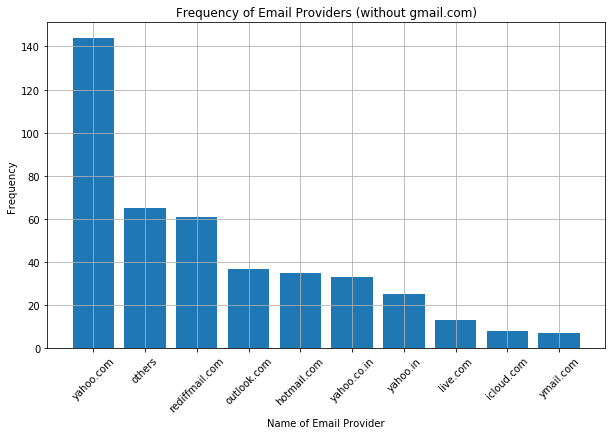

In [214]:
#plotting the bar chart with new keys and values
fig = plt.figure(figsize = (10,6))
plt.bar(new_keys,new_values)
plt.xticks(rotation=45)
plt.grid()
plt.title("Frequency of Email Providers (without gmail.com)")
plt.xlabel("Name of Email Provider")
plt.ylabel("Frequency")
plt.show()
fig.savefig('barchart_email_no_gamil.png', bbox_inches = "tight")

It can be interpreted from the bar chart that 'yahoo.com' is the second most popular email provider after 'gmail.com' and 'rediffmail.com' is the third most popular email provider. It is interesting to note that 'outlook.com', 'hotmail.com' and 'yahoo.co.in' are almost similar in popularity.

# Analyzing the average length of emailIDs:

In [204]:
#calculating the length of emailIDs
email_length = []
for email in email_IDs:
    email_length.append(len(email))
#print(email_length)

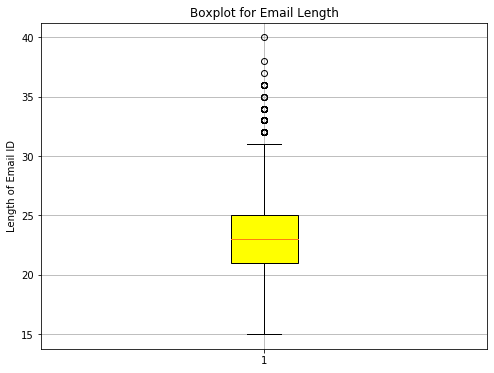

In [211]:
#plotting the boxplot for length of emailIDs
fig = plt.figure(figsize = (8,6))
box = plt.boxplot(email_length, patch_artist=True)
box['boxes'][0].set_facecolor('yellow')
plt.grid()
plt.title("Boxplot for Email Length")
plt.ylabel("Length of Email ID")
plt.show()
fig.savefig('boxplot_email.png', bbox_inches = "tight")

It can be interpreted from the boxplot that the average length of an email ID ranges between 21 and 25 characters, with maximum email IDs of length 23. There are very few people who create email ID of length more than 31 characters.